In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_covid = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")

In [3]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47585 entries, 0 to 47584
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(77), int64(56), object(2)
memory usage: 49.0+ MB


In [4]:
df_beds = data_covid[['state', 
                    'date', 
                    'inpatient_beds', 
                    'inpatient_beds_used',
                    'inpatient_beds_used_covid',
                    'staffed_adult_icu_bed_occupancy', 
                    'staffed_icu_adult_patients_confirmed_covid', 
                    'staffed_icu_adult_patients_confirmed_and_suspected_covid', 
                    'total_staffed_adult_icu_beds', 
                    'staffed_pediatric_icu_bed_occupancy', 
                    'staffed_icu_pediatric_patients_confirmed_covid',
                    'total_staffed_pediatric_icu_beds',
                    'total_adult_patients_hospitalized_confirmed_covid', 
                    'total_adult_patients_hospitalized_confirmed_and_suspected_covid', 
                    'total_pediatric_patients_hospitalized_confirmed_covid', 
                    'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid', 
                    'deaths_covid']]

df_beds.head()

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid
0,VT,2020/10/16,1301.0,901.0,2.0,75.0,0.0,0.0,110.0,19.0,0.0,33.0,0.0,1.0,0.0,1.0,0.0
1,VI,2020/10/15,188.0,98.0,4.0,10.0,1.0,1.0,20.0,NaN,NaN,NaN,4.0,4.0,0.0,0.0,0.0
2,PR,2020/10/14,9743.0,5367.0,384.0,470.0,45.0,51.0,671.0,4.0,0.0,15.0,202.0,349.0,10.0,35.0,6.0
3,VI,2020/10/13,188.0,94.0,4.0,10.0,1.0,1.0,20.0,NaN,NaN,NaN,4.0,4.0,0.0,0.0,0.0
4,AL,2020/10/10,15210.0,10764.0,983.0,1297.0,270.0,292.0,1562.0,0.0,0.0,0.0,805.0,961.0,17.0,22.0,16.0


In [5]:
df_beds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47585 entries, 0 to 47584
Data columns (total 17 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   state                                                                47585 non-null  object 
 1   date                                                                 47585 non-null  object 
 2   inpatient_beds                                                       47580 non-null  float64
 3   inpatient_beds_used                                                  47321 non-null  float64
 4   inpatient_beds_used_covid                                            47501 non-null  float64
 5   staffed_adult_icu_bed_occupancy                                      40389 non-null  float64
 6   staffed_icu_adult_patients_confirmed_covid                           40619 non-null  float64
 7   staf

In [6]:
df_beds['date'] = pd.to_datetime(df_beds['date'])

C:\Users\Jeampierr\AppData\Local\Temp\ipykernel_29332\3965977966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beds['date'] = pd.to_datetime(df_beds['date'])


In [7]:
df_beds['date'].sort_values().reset_index()
df_beds.head()

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid
0,VT,2020-10-16,1301.0,901.0,2.0,75.0,0.0,0.0,110.0,19.0,0.0,33.0,0.0,1.0,0.0,1.0,0.0
1,VI,2020-10-15,188.0,98.0,4.0,10.0,1.0,1.0,20.0,NaN,NaN,NaN,4.0,4.0,0.0,0.0,0.0
2,PR,2020-10-14,9743.0,5367.0,384.0,470.0,45.0,51.0,671.0,4.0,0.0,15.0,202.0,349.0,10.0,35.0,6.0
3,VI,2020-10-13,188.0,94.0,4.0,10.0,1.0,1.0,20.0,NaN,NaN,NaN,4.0,4.0,0.0,0.0,0.0
4,AL,2020-10-10,15210.0,10764.0,983.0,1297.0,270.0,292.0,1562.0,0.0,0.0,0.0,805.0,961.0,17.0,22.0,16.0


In [8]:
df_beds.isnull().mean()

state                                                                  0.000000
date                                                                   0.000000
inpatient_beds                                                         0.000105
inpatient_beds_used                                                    0.005548
inpatient_beds_used_covid                                              0.001765
staffed_adult_icu_bed_occupancy                                        0.151224
staffed_icu_adult_patients_confirmed_covid                             0.146391
staffed_icu_adult_patients_confirmed_and_suspected_covid               0.149543
total_staffed_adult_icu_beds                                           0.147168
staffed_pediatric_icu_bed_occupancy                                    0.174488
staffed_icu_pediatric_patients_confirmed_covid                         0.633582
total_staffed_pediatric_icu_beds                                       0.174824
total_adult_patients_hospitalized_confir

In [9]:
df_beds = df_beds.fillna(0)
df_beds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47585 entries, 0 to 47584
Data columns (total 17 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   state                                                                47585 non-null  object        
 1   date                                                                 47585 non-null  datetime64[ns]
 2   inpatient_beds                                                       47585 non-null  float64       
 3   inpatient_beds_used                                                  47585 non-null  float64       
 4   inpatient_beds_used_covid                                            47585 non-null  float64       
 5   staffed_adult_icu_bed_occupancy                                      47585 non-null  float64       
 6   staffed_icu_adult_patients_confirmed_covid    

# Cuestionario

Para guiar nuestro trabajo, nuestro Team Líder nos facilita un cuestionario. Entonces, usando los datos ingestados anteriormente debemos responder:

1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [10]:
#Creareamos un mask para filtrar nuestro dataframe dentro del periodo de tiempo solicitado en el enunciado.
mask1 = (df_beds['date'] > '2020-01-01') & (df_beds['date'] <= '2020-06-30')

In [11]:
semestre1_2020 = df_beds.loc[mask1]
semestre1_2020.head()

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid
51,ME,2020-06-22,3136.0,1856.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52,LA,2020-06-16,6815.0,4617.0,755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,454.0,0.0,0.0,8.0
53,MT,2020-06-14,3019.0,1302.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,SD,2020-06-13,2036.0,596.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,NE,2020-06-04,5278.0,3034.0,247.0,0.0,4.0,0.0,94.0,0.0,0.0,0.0,26.0,31.0,0.0,0.0,1.0


In [12]:
semestre1_2020.shape

(6685, 17)

In [13]:
semestre1_2020['suma_comun_covid'] = semestre1_2020['total_adult_patients_hospitalized_confirmed_covid'] + semestre1_2020['total_pediatric_patients_hospitalized_confirmed_covid']
semestre1_2020.head()

C:\Users\Jeampierr\AppData\Local\Temp\ipykernel_29332\2493082146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semestre1_2020['suma_comun_covid'] = semestre1_2020['total_adult_patients_hospitalized_confirmed_covid'] + semestre1_2020['total_pediatric_patients_hospitalized_confirmed_covid']


,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid,suma_comun_covid
51,ME,2020-06-22,3136.0,1856.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
52,LA,2020-06-16,6815.0,4617.0,755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,367.0,454.0,0.0,0.0,8.0,367.0
53,MT,2020-06-14,3019.0,1302.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,SD,2020-06-13,2036.0,596.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,NE,2020-06-04,5278.0,3034.0,247.0,0.0,4.0,0.0,94.0,0.0,0.0,0.0,26.0,31.0,0.0,0.0,1.0,26.0


In [14]:
top5_comun_covid = semestre1_2020.groupby(['state'])['suma_comun_covid'].sum().sort_values(ascending=False).head()
top5_comun_covid

state
LA    40452.0
CA    36134.0
NV    20134.0
AZ     5177.0
IA     3174.0
Name: suma_comun_covid, dtype: float64

<AxesSubplot:xlabel='state'>

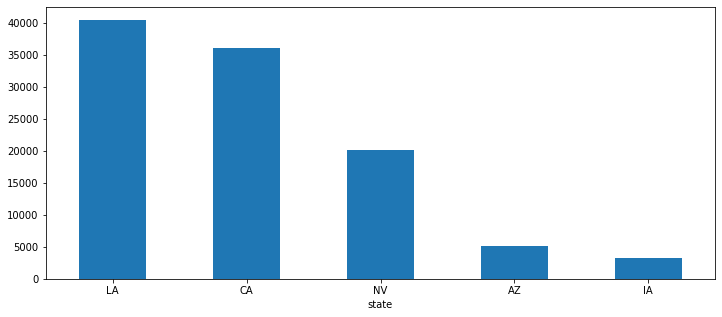

In [15]:
fig, axs = plt.subplots(figsize=(12, 5))

semestre1_2020.groupby('state')['suma_comun_covid'].sum().sort_values(ascending=False).head().plot(kind='bar', rot=0, ax=axs)

2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

Intervalos de crecimiento y decrecimiento
Puntos críticos (mínimos y máximos)

In [16]:
nueva_york = df_beds['state'] == 'NY'
ny_data = df_beds[nueva_york]
ny_data.head()

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid
587,NY,2020-09-15,42256.0,32528.0,1369.0,2676.0,116.0,213.0,4699.0,751.0,2.0,904.0,553.0,1284.0,14.0,51.0,10.0
779,NY,2020-08-30,41315.0,28946.0,1327.0,2554.0,90.0,165.0,4603.0,696.0,2.0,900.0,443.0,1237.0,14.0,46.0,8.0
801,NY,2020-11-04,48521.0,34667.0,2179.0,3318.0,269.0,332.0,5779.0,947.0,0.0,1369.0,1406.0,2121.0,17.0,58.0,21.0
890,NY,2020-06-06,37340.0,23561.0,3989.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,31.0
918,NY,2020-11-12,50999.0,38216.0,2891.0,3449.0,339.0,456.0,5882.0,954.0,0.0,1407.0,1886.0,2797.0,25.0,94.0,25.0


In [17]:
ny_data['suma_comun_covid'] = ny_data['total_adult_patients_hospitalized_confirmed_covid'] + ny_data['total_pediatric_patients_hospitalized_confirmed_covid']

C:\Users\Jeampierr\AppData\Local\Temp\ipykernel_29332\3431137577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data['suma_comun_covid'] = ny_data['total_adult_patients_hospitalized_confirmed_covid'] + ny_data['total_pediatric_patients_hospitalized_confirmed_covid']


In [18]:
ny_data.head()

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid,suma_comun_covid
587,NY,2020-09-15,42256.0,32528.0,1369.0,2676.0,116.0,213.0,4699.0,751.0,2.0,904.0,553.0,1284.0,14.0,51.0,10.0,567.0
779,NY,2020-08-30,41315.0,28946.0,1327.0,2554.0,90.0,165.0,4603.0,696.0,2.0,900.0,443.0,1237.0,14.0,46.0,8.0,457.0
801,NY,2020-11-04,48521.0,34667.0,2179.0,3318.0,269.0,332.0,5779.0,947.0,0.0,1369.0,1406.0,2121.0,17.0,58.0,21.0,1423.0
890,NY,2020-06-06,37340.0,23561.0,3989.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,31.0,5.0
918,NY,2020-11-12,50999.0,38216.0,2891.0,3449.0,339.0,456.0,5882.0,954.0,0.0,1407.0,1886.0,2797.0,25.0,94.0,25.0,1911.0


In [19]:
ny_data.set_index('date', inplace = True)
ny_data.head()

,state,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid,suma_comun_covid
date,,,,,,,,,,,,,,,,,
2020-09-15,NY,42256.0,32528.0,1369.0,2676.0,116.0,213.0,4699.0,751.0,2.0,904.0,553.0,1284.0,14.0,51.0,10.0,567.0
2020-08-30,NY,41315.0,28946.0,1327.0,2554.0,90.0,165.0,4603.0,696.0,2.0,900.0,443.0,1237.0,14.0,46.0,8.0,457.0
2020-11-04,NY,48521.0,34667.0,2179.0,3318.0,269.0,332.0,5779.0,947.0,0.0,1369.0,1406.0,2121.0,17.0,58.0,21.0,1423.0
2020-06-06,NY,37340.0,23561.0,3989.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,31.0,5.0
2020-11-12,NY,50999.0,38216.0,2891.0,3449.0,339.0,456.0,5882.0,954.0,0.0,1407.0,1886.0,2797.0,25.0,94.0,25.0,1911.0


In [20]:
print(ny_data['suma_comun_covid'].min(), ny_data['suma_comun_covid'].max())

0.0 12731.0


In [21]:
ny_data['suma_comun_covid'].max()

12731.0

<AxesSubplot:xlabel='date'>

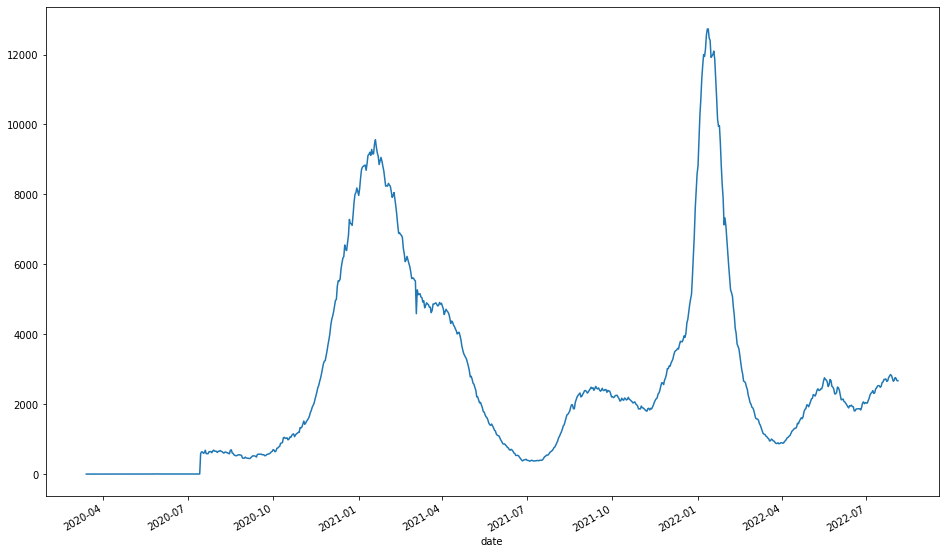

In [22]:
ny_data['suma_comun_covid'].plot(figsize=(16, 10))

3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [23]:
#Creareamos un mask para filtrar nuestro dataframe dentro del periodo de tiempo solicitado en el enunciado.
mask2 = (df_beds['date'] > '2020-01-01') & (df_beds['date'] <= '2020-12-31')

In [24]:
all_2020 = df_beds.loc[mask2]
all_2020.head()

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid
0,VT,2020-10-16,1301.0,901.0,2.0,75.0,0.0,0.0,110.0,19.0,0.0,33.0,0.0,1.0,0.0,1.0,0.0
1,VI,2020-10-15,188.0,98.0,4.0,10.0,1.0,1.0,20.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0
2,PR,2020-10-14,9743.0,5367.0,384.0,470.0,45.0,51.0,671.0,4.0,0.0,15.0,202.0,349.0,10.0,35.0,6.0
3,VI,2020-10-13,188.0,94.0,4.0,10.0,1.0,1.0,20.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0
4,AL,2020-10-10,15210.0,10764.0,983.0,1297.0,270.0,292.0,1562.0,0.0,0.0,0.0,805.0,961.0,17.0,22.0,16.0


In [25]:
all_2020['suma_uci'] = all_2020['staffed_adult_icu_bed_occupancy'] + all_2020['staffed_pediatric_icu_bed_occupancy']
all_2020.head()

C:\Users\Jeampierr\AppData\Local\Temp\ipykernel_29332\2391475088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_2020['suma_uci'] = all_2020['staffed_adult_icu_bed_occupancy'] + all_2020['staffed_pediatric_icu_bed_occupancy']


,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid,suma_uci
0,VT,2020-10-16,1301.0,901.0,2.0,75.0,0.0,0.0,110.0,19.0,0.0,33.0,0.0,1.0,0.0,1.0,0.0,94.0
1,VI,2020-10-15,188.0,98.0,4.0,10.0,1.0,1.0,20.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,10.0
2,PR,2020-10-14,9743.0,5367.0,384.0,470.0,45.0,51.0,671.0,4.0,0.0,15.0,202.0,349.0,10.0,35.0,6.0,474.0
3,VI,2020-10-13,188.0,94.0,4.0,10.0,1.0,1.0,20.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,10.0
4,AL,2020-10-10,15210.0,10764.0,983.0,1297.0,270.0,292.0,1562.0,0.0,0.0,0.0,805.0,961.0,17.0,22.0,16.0,1297.0


In [26]:
all_2020.shape

(16437, 18)

In [27]:
top5_uci = all_2020.groupby(['state'])['suma_uci'].sum().sort_values(ascending=False).head()
top5_uci

state
CA    1123211.0
TX    1047029.0
FL     895664.0
NY     633266.0
PA     567704.0
Name: suma_uci, dtype: float64

<AxesSubplot:xlabel='state'>

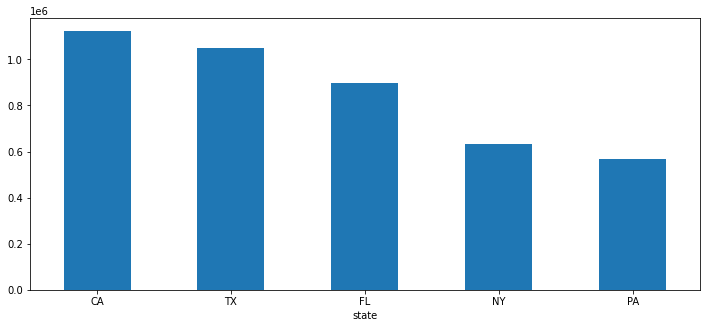

In [28]:
fig, axs = plt.subplots(figsize=(12, 5))

all_2020.groupby('state')['suma_uci'].sum().sort_values(ascending=False).head().plot(kind='bar', rot=0, ax=axs)

4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

Para resolver esta pregunta efectuaremos la suma de 2 columnas de nuestro dataframe las cuales son:

* staffed_icu_pediatric_patients_confirmed_covid
* total_pediatric_patients_hospitalized_confirmed_covid

In [29]:
all_2020['suma_covid_ped'] = all_2020['staffed_icu_pediatric_patients_confirmed_covid'] + all_2020['total_pediatric_patients_hospitalized_confirmed_covid']
all_2020.head()

C:\Users\Jeampierr\AppData\Local\Temp\ipykernel_29332\272448867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_2020['suma_covid_ped'] = all_2020['staffed_icu_pediatric_patients_confirmed_covid'] + all_2020['total_pediatric_patients_hospitalized_confirmed_covid']


,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid,suma_uci,suma_covid_ped
0,VT,2020-10-16,1301.0,901.0,2.0,75.0,0.0,0.0,110.0,19.0,0.0,33.0,0.0,1.0,0.0,1.0,0.0,94.0,0.0
1,VI,2020-10-15,188.0,98.0,4.0,10.0,1.0,1.0,20.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,10.0,0.0
2,PR,2020-10-14,9743.0,5367.0,384.0,470.0,45.0,51.0,671.0,4.0,0.0,15.0,202.0,349.0,10.0,35.0,6.0,474.0,10.0
3,VI,2020-10-13,188.0,94.0,4.0,10.0,1.0,1.0,20.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,10.0,0.0
4,AL,2020-10-10,15210.0,10764.0,983.0,1297.0,270.0,292.0,1562.0,0.0,0.0,0.0,805.0,961.0,17.0,22.0,16.0,1297.0,17.0


In [30]:
top5_covid_ped = all_2020.groupby(['state'])['suma_covid_ped'].sum().sort_values(ascending=False)
top5_covid_ped.head()

state
TX    12904.0
CA    11020.0
FL     7675.0
AZ     6411.0
PA     5987.0
Name: suma_covid_ped, dtype: float64

<AxesSubplot:xlabel='state'>

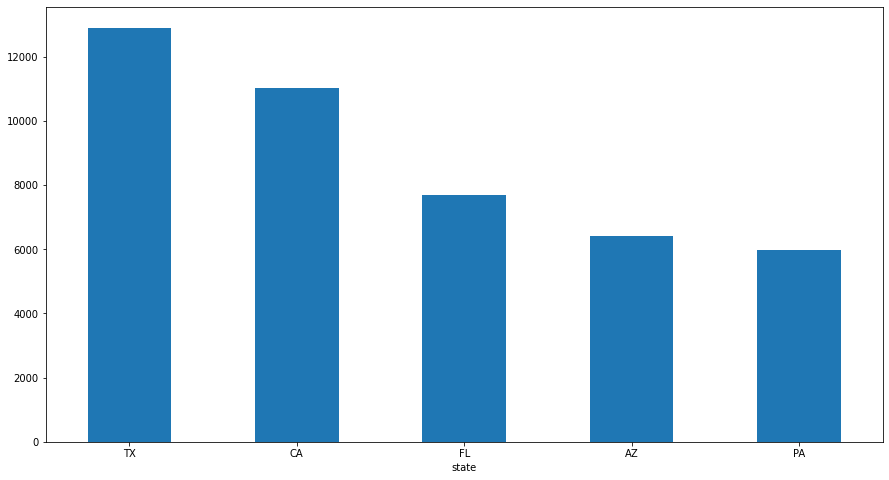

In [31]:
fig, axs = plt.subplots(figsize=(15, 8))

all_2020.groupby('state')['suma_covid_ped'].sum().sort_values(ascending=False).head().plot(kind='bar', rot=0, ax=axs)

5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

Para hallar el valor de porcentajes de camas UCI que corresponden a casos confirmados de COVID-19 tendremos que crear una nueva columna calculada en nuestro dataframe, para lo cual emplearemos las siguientes columnas:

* staffed_icu_adult_patients_confirmed_covid
* staffed_icu_pediatric_patients_confirmed_covid
* total_staffed_adult_icu_beds
* total_staffed_pediatric_icu_beds

df_beds['porc_uci_covid'] = round(((beds_adu_uci_covid + beds_ped_uci_covid)/(tot_beds_adu_uci + tot_beds_ped_uci))*100, 2)

df_beds.head()

In [32]:
beds_adu_uci_covid = df_beds.groupby('state')['staffed_icu_adult_patients_confirmed_covid'].sum()
beds_ped_uci_covid = df_beds.groupby('state')['staffed_icu_pediatric_patients_confirmed_covid'].sum()
tot_beds_adu_uci = df_beds.groupby('state')['total_staffed_adult_icu_beds'].sum()
tot_beds_ped_uci = df_beds.groupby('state')['total_staffed_pediatric_icu_beds'].sum()

uci = pd.DataFrame([beds_adu_uci_covid, beds_ped_uci_covid, tot_beds_adu_uci, tot_beds_ped_uci]).T

In [33]:
uci.columns

Index(['staffed_icu_adult_patients_confirmed_covid',
       'staffed_icu_pediatric_patients_confirmed_covid',
       'total_staffed_adult_icu_beds', 'total_staffed_pediatric_icu_beds'],
      dtype='object')

In [34]:
val1 = uci['staffed_icu_adult_patients_confirmed_covid']
val2 = uci['staffed_icu_pediatric_patients_confirmed_covid']
val3 = uci['total_staffed_adult_icu_beds']
val4 = uci['total_staffed_pediatric_icu_beds']

uci['porc_uci_covid'] = round((((val1 + val2)/(val3 + val4))*100), 2)

uci.head()

,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_adult_icu_beds,total_staffed_pediatric_icu_beds,porc_uci_covid
state,,,,,
AK,11233.0,116.0,93772.0,36327.0,8.72
AL,218865.0,568.0,1174106.0,12958.0,18.49
AR,140345.0,992.0,725640.0,247201.0,14.53
AS,2.0,0.0,2421.0,0.0,0.08
AZ,237500.0,1774.0,1454680.0,201888.0,14.44


In [35]:
uci['porc_uci_covid'].max()

20.41

In [36]:
top5_porc_uci_covid_by_state = uci.groupby(['state'])['porc_uci_covid'].sum().sort_values(ascending=False)
top5_porc_uci_covid_by_state.head()

state
TX    20.41
NV    18.84
AL    18.49
NM    18.42
GA    17.68
Name: porc_uci_covid, dtype: float64

6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [37]:
mask3 = (df_beds['date'] > '2021-01-01') & (df_beds['date'] <= '2021-12-31')
all_2021 = df_beds.loc[mask3]
all_2021.head()

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,staffed_adult_icu_bed_occupancy,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,deaths_covid
88,AS,2021-12-30,150.0,64.0,0.0,3.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,VT,2021-12-30,1230.0,841.0,59.0,76.0,19.0,20.0,95.0,16.0,0.0,33.0,56.0,58.0,1.0,1.0,1.0
90,DE,2021-12-28,2885.0,2198.0,454.0,159.0,48.0,51.0,200.0,112.0,0.0,172.0,423.0,444.0,7.0,10.0,2.0
91,DE,2021-12-22,3479.0,2698.0,404.0,159.0,44.0,46.0,195.0,111.0,0.0,172.0,364.0,394.0,10.0,10.0,4.0
92,ND,2021-12-20,1903.0,1445.0,218.0,155.0,70.0,73.0,205.0,26.0,0.0,56.0,188.0,211.0,0.0,7.0,3.0


In [38]:
all_2021.shape

(19422, 17)

In [39]:
deaths_covid_2021 = all_2021.groupby(['state'])['deaths_covid'].sum().sort_values(ascending=False)
deaths_covid_2021.head()

state
CA    34649.0
TX    32709.0
FL    25899.0
NY    17517.0
AZ    16168.0
Name: deaths_covid, dtype: float64

In [40]:
df_deaths_covid_2021 = pd.DataFrame(deaths_covid_2021)
df_deaths_covid_2021.head()

,deaths_covid
state,
CA,34649.0
TX,32709.0
FL,25899.0
NY,17517.0
AZ,16168.0


In [41]:
df_deaths_covid_2021['deaths_covid'].sum() 

314872.0

<AxesSubplot:xlabel='state'>

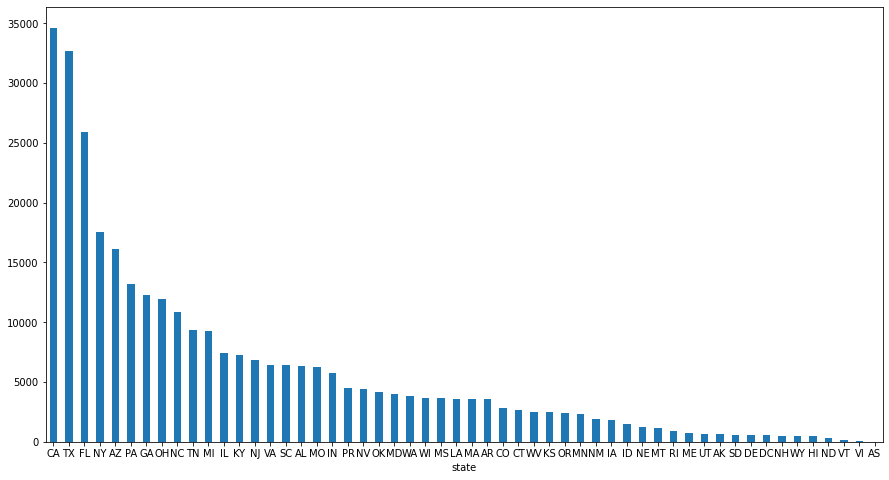

In [42]:
fig, axs = plt.subplots(figsize=(15, 8))

all_2021.groupby(['state'])['deaths_covid'].sum().sort_values(ascending=False).plot(kind='bar', rot=0, ax=axs)

7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

# Dashboard

In [43]:
df_beds['Year'] = pd.DatetimeIndex(df_beds['date']).year
df_beds['Mes'] = pd.DatetimeIndex(df_beds['date']).month
df_beds['hosp_covid'] = df_beds['total_adult_patients_hospitalized_confirmed_and_suspected_covid'] + df_beds['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid']
df_beds['uso_uci'] = df_beds['staffed_adult_icu_bed_occupancy'] + df_beds['staffed_pediatric_icu_bed_occupancy']
df_beds['ocup_hosp'] = df_beds['hosp_covid'] + df_beds['staffed_icu_adult_patients_confirmed_and_suspected_covid'] + df_beds['staffed_icu_pediatric_patients_confirmed_covid']

In [44]:
df_beds.columns

Index(['state', 'date', 'inpatient_beds', 'inpatient_beds_used',
       'inpatient_beds_used_covid', 'staffed_adult_icu_bed_occupancy',
       'staffed_icu_adult_patients_confirmed_covid',
       'staffed_icu_adult_patients_confirmed_and_suspected_covid',
       'total_staffed_adult_icu_beds', 'staffed_pediatric_icu_bed_occupancy',
       'staffed_icu_pediatric_patients_confirmed_covid',
       'total_staffed_pediatric_icu_beds',
       'total_adult_patients_hospitalized_confirmed_covid',
       'total_adult_patients_hospitalized_confirmed_and_suspected_covid',
       'total_pediatric_patients_hospitalized_confirmed_covid',
       'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid',
       'deaths_covid', 'Year', 'Mes', 'hosp_covid', 'uso_uci', 'ocup_hosp'],
      dtype='object')

In [45]:
data_dashboard = df_beds[['state', 'date', 'Year', 'Mes', 'hosp_covid', 'uso_uci', 'ocup_hosp', 'deaths_covid']]
data_dashboard.head()

,state,date,Year,Mes,hosp_covid,uso_uci,ocup_hosp,deaths_covid
0,VT,2020-10-16,2020,10,2.0,94.0,2.0,0.0
1,VI,2020-10-15,2020,10,4.0,10.0,5.0,0.0
2,PR,2020-10-14,2020,10,384.0,474.0,435.0,6.0
3,VI,2020-10-13,2020,10,4.0,10.0,5.0,0.0
4,AL,2020-10-10,2020,10,983.0,1297.0,1275.0,16.0


In [46]:
data_dashboard = data_dashboard.rename(columns={'state': 'code'})
data_dashboard.head()

,code,date,Year,Mes,hosp_covid,uso_uci,ocup_hosp,deaths_covid
0,VT,2020-10-16,2020,10,2.0,94.0,2.0,0.0
1,VI,2020-10-15,2020,10,4.0,10.0,5.0,0.0
2,PR,2020-10-14,2020,10,384.0,474.0,435.0,6.0
3,VI,2020-10-13,2020,10,4.0,10.0,5.0,0.0
4,AL,2020-10-10,2020,10,983.0,1297.0,1275.0,16.0


In [47]:
data_dashboard.to_csv('data_dash.csv', sep=',', index=False)